In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
# df = pd.read_csv("NSL_KDD_Train.csv")
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df_train = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


### Combine the train and test dataset

In [4]:
df = pd.concat([df_train,df_test])

In [5]:
print(f"Dimentions of complete dataframe : {df.shape}")

Dimentions of complete dataframe : (148517, 42)


In [6]:
pd.options.display.max_rows = 999999
pd.options.display.max_columns = 500
pd.options.display.max_colwidth=1000

In [7]:
df.head(10)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          0                0   
6               0       0    0                  0          0                0   
7               0       0    0                  0          0                0   
8               0       0    0                  0          0                0   
9               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   
5                 0                  0              0               0    121   
6                 0                  0              0               0    166   
7                 0                  0              0               0    117   
8                 0                  0              0               0    270   
9                 0                  0              0               0    133   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   
5         19          0.0              0.0          1.0              1.0   
6          9          1.0              1.0          0.0              0.0   
7  

In [8]:
# df.to_csv("NSL_KDD.csv")

### List of distinct labels


In [9]:
label_unique = df["label"].unique()
protocol_type_unique = df["protocol_type"].unique()
service_unique = df["service"].unique()
flag_unique = df["flag"].unique()

In [10]:
label_unique

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

### Network Traffic Attack Types in NSL KDD Dataset:

**Probes:**

* **neptune, ipsweep, portsweep, nmap, satan:** These attacks aim to gather information about a network and its vulnerabilities. They scan for active hosts, open ports, and running services.
* **teardrop, smurf, pod:** These are more complex probes that exploit specific network protocol vulnerabilities to crash or overwhelm devices.

**Denial-of-Service (DoS):**

* **warezclient, warezmaster, phf, land, loadmodule:** These attacks aim to disrupt services by flooding the target with excessive traffic, consuming resources, and rendering it unavailable.

**User to Root (U2R):**

* **guess_passwd, ftp_write, multihop, rootkit:** These attacks exploit vulnerabilities in applications or protocols to gain unauthorized access and escalate privileges to root (super user) level.

**Remote to Local (R2L):**

* **back, imap, buffer_overflow, perl:** These attacks target specific user accounts or services to gain unauthorized access from a remote location.




In [11]:
protocol_type_unique

array(['tcp', 'udp', 'icmp'], dtype=object)

In [12]:
service_unique

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [13]:
flag_unique

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

### Instead of one hot encoding we will try label encoding to convert the categorical values to numerical ones.

In [14]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['protocol_type', 'service', 'flag']

label_encoder = LabelEncoder()

for i in categorical_columns:
  df[i]= label_encoder.fit_transform(df[i])


In [15]:
df.head(10)

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   
5         0              1       49     1          0          0     0   
6         0              1       49     5          0          0     0   
7         0              1       49     5          0          0     0   
8         0              1       51     5          0          0     0   
9         0              1       49     5          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          0                0   
6               0       0    0                  0          0                0   
7               0       0    0                  0          0                0   
8               0       0    0                  0          0                0   
9               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   
5                 0                  0              0               0    121   
6                 0                  0              0               0    166   
7                 0                  0              0               0    117   
8                 0                  0              0               0    270   
9                 0                  0              0               0    133   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   
5         19          0.0              0.0          1.0              1.0   
6          9          1.0              1.0          0.0              0.0   
7         16  

### Scaling numericals values

In [16]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ["duration","src_bytes", "dst_bytes","protocol_type", "service", "flag", "urgent", "hot", "num_failed_logins","num_compromised","su_attempted", "num_root" ,"num_file_creations" ,"num_shells","num_access_files","count","srv_count","dst_host_count", "dst_host_srv_count"]

min_max_scaler = MinMaxScaler()
df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

In [17]:
df_preprocessed = df.copy()

In [18]:
df_preprocessed.shape

(148517, 42)

In [19]:
df_preprocessed.head(3)

duration  protocol_type   service  flag     src_bytes  dst_bytes  land  \
0       0.0            0.5  0.289855   0.9  3.558064e-07        0.0     0   
1       0.0            1.0  0.637681   0.9  1.057999e-07        0.0     0   
2       0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0     0.0  0.0                0.0          0              0.0   
1               0     0.0  0.0                0.0          0              0.0   
2               0     0.0  0.0                0.0          0              0.0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0           0.0       0.0                 0.0         0.0   
1           0           0.0       0.0                 0.0         0.0   
2           0           0.0       0.0                 0.0         0.0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  \
0               0.0                  0              0               0   
1               0.0                  0              0               0   
2               0.0                  0              0               0   

      count  srv_count  serror_rate  srv_serror_rate  rerror_rate  \
0  0.003914   0.003914          0.0              0.0          0.0   
1  0.025440   0.001957          0.0              0.0          0.0   
2  0.240705   0.011742          1.0              1.0          0.0   

   srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
0              0.0           1.00           0.00                 0.0   
1              0.0           0.08           0.15                 0.0   
2              0.0           0.05           0.07                 0.0   

   dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0        0.588235            0.098039                    0.17   
1        1.000000            0.003922                    0.00   
2        1.000000            0.101961                    0.10   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   1.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  0.05                       0.0   
1                       0.0                  0.00                       0.0   
2                       1.0                  0.00                       0.0   

     label  
0   normal  
1   normal  
2  neptune

In [20]:
df_preprocessed_corr = df_preprocessed.copy()

In [21]:
target = []
for i in df_preprocessed_corr["label"]:
  if i == "normal":
    target += [1]
  else :
    target += [0]
df_preprocessed_corr["label"] = np.array(target)

In [22]:
df_preprocessed_corr.head(20)

duration  protocol_type   service  flag     src_bytes     dst_bytes  land  \
0        0.0            0.5  0.289855   0.9  3.558064e-07  0.000000e+00     0   
1        0.0            1.0  0.637681   0.9  1.057999e-07  0.000000e+00     0   
2        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
3        0.0            0.5  0.347826   0.9  1.681203e-07  6.223962e-06     0   
4        0.0            0.5  0.347826   0.9  1.442067e-07  3.206260e-07     0   
5        0.0            0.5  0.710145   0.1  0.000000e+00  0.000000e+00     0   
6        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
7        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
8        0.0            0.5  0.739130   0.5  0.000000e+00  0.000000e+00     0   
9        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
10       0.0            0.5  0.710145   0.1  0.000000e+00  0.000000e+00     0   
11       0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
12       0.0            0.5  0.347826   0.9  2.079765e-07  1.718403e-06     0   
13       0.0            0.5  0.289855   0.9  2.420353e-07  0.000000e+00     0   
14       0.0            0.5  0.521739   0.5  0.000000e+00  0.000000e+00     0   
15       0.0            0.5  0.550725   0.5  0.000000e+00  0.000000e+00     0   
16       0.0            0.5  0.347826   0.9  2.173970e-07  1.052569e-05     0   
17       0.0            0.0  0.202899   0.9  1.304382e-08  0.000000e+00     0   
18       0.0            0.5  0.347826   0.9  1.688450e-07  4.702515e-07     0   
19       0.0            0.5  0.347826   0.9  2.485572e-07  8.992796e-07     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                0     0.0  0.0                0.0          0   
1                0     0.0  0.0                0.0          0   
2                0     0.0  0.0                0.0          0   
3                0     0.0  0.0                0.0          1   
4                0     0.0  0.0                0.0          1   
5                0     0.0  0.0                0.0          0   
6                0     0.0  0.0                0.0          0   
7                0     0.0  0.0                0.0          0   
8                0     0.0  0.0                0.0          0   
9                0     0.0  0.0                0.0          0   
10               0     0.0  0.0                0.0          0   
11               0     0.0  0.0                0.0          0   
12               0     0.0  0.0                0.0          1   
13               0     0.0  0.0                0.0          1   
14               0     0.0  0.0                0.0          0   
15               0     0.0  0.0                0.0          0   
16               0     0.0  0.0                0.0          1   
17               0     0.0  0.0                0.0          0   
18               0     0.0  0.0                0.0          1   
19               0     0.0  0.0                0.0          1   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
0               0.0           0           0.0       0.0                 0.0   
1               0.0           0           0.0       0.0                 0.0   
2               0.0           0           0.0       0.0                 0.0   
3               0.0           0           0.0       0.0                 0.0   
4               0.0           0           0.0       0.0                 0.0   
5               0.0           0           0.0       0.0                 0.0   
6               0.0           0           0.0       0.0                 0.0   
7               0.0           0           0.0       0.0                 0.0   
8               0.0           0           0.0       0.0                 0.0   
9               0.0           0           0.0       0.0                 0.0   
10              0.0           0           0.0       0.0            

### Finding importance of each feature

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_preprocessed_corr.corr()

plt.figure(figsize=(100, 100))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.title("Correlation Matrix", fontsize=16)

plt.show()

In [24]:
correlation_matrix = df_preprocessed_corr.corr()
correlation_matrix

label_correlations = correlation_matrix['label'].sort_values(ascending=False)

print(f"Correlation with label (target attribute)\n: {label_correlations}")


Correlation with label (target attribute)
: label                          1.000000
same_srv_rate                  0.708911
dst_host_srv_count             0.692577
dst_host_same_srv_rate         0.667624
logged_in                      0.664117
flag                           0.629556
protocol_type                  0.271630
srv_diff_host_rate             0.113183
num_access_files               0.035478
su_attempted                   0.021545
num_file_creations             0.017585
srv_count                      0.015006
root_shell                     0.013468
num_root                       0.011165
num_compromised                0.009900
hot                            0.009637
num_shells                     0.000259
dst_bytes                     -0.003583
is_guest_login                -0.003839
urgent                        -0.003862
src_bytes                     -0.005457
is_host_login                 -0.007835
land                          -0.008817
num_failed_logins             -0.042

### Attributes with high positive correlation with label
* same_srv_rate                  = 0.708911
* dst_host_srv_count             = 0.692577
* dst_host_same_srv_rate         = 0.667624
* logged_in                      = 0.664117
* flag                           = 0.629556


### Attributes with high negative correlation with label
* count                      =    -0.524108
* srv_serror_rate            =    -0.586636
* serror_rate                =    -0.588474
* dst_host_serror_rate       =    -0.589936
* dst_host_srv_serror_rate   =    -0.593690

#### num_outbound_cmds has a correlation value of NaN it may indicate the standard deviation is 0 ie the value remains constant for all data points. Hence its best to remove it from the dataframe

In [25]:
df_preprocessed_corr['num_outbound_cmds'].unique()

array([0])

### Feature importance

In [26]:
# from sklearn.ensemble import RandomForestClassifier

# X = df_preprocessed_corr.drop('label', axis=1)
# y = df_preprocessed_corr['label']

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X, y)

# feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# feature_importances.nlargest(10).plot(kind='barh')
# plt.title('Top 10 Feature Importances')
# plt.show()

### Normal and Anomalous traffic data after preprocessing

In [27]:
normal_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]=="normal"]
anomalous_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]!="normal"]

In [28]:
normal_traffic_preprocessed.head(10)

duration  protocol_type   service  flag     src_bytes     dst_bytes  land  \
0    0.00000            0.5  0.289855   0.9  3.558064e-07  0.000000e+00     0   
1    0.00000            1.0  0.637681   0.9  1.057999e-07  0.000000e+00     0   
3    0.00000            0.5  0.347826   0.9  1.681203e-07  6.223962e-06     0   
4    0.00000            0.5  0.347826   0.9  1.442067e-07  3.206260e-07     0   
12   0.00000            0.5  0.347826   0.9  2.079765e-07  1.718403e-06     0   
16   0.00000            0.5  0.347826   0.9  2.173970e-07  1.052569e-05     0   
18   0.00000            0.5  0.347826   0.9  1.688450e-07  4.702515e-07     0   
19   0.00000            0.5  0.347826   0.9  2.485572e-07  8.992796e-07     0   
22   0.00000            0.5  0.347826   0.9  1.833381e-07  9.088221e-06     0   
23   0.09715            1.0  0.637681   0.9  1.065245e-07  8.015650e-08     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                0     0.0  0.0                0.0          0   
1                0     0.0  0.0                0.0          0   
3                0     0.0  0.0                0.0          1   
4                0     0.0  0.0                0.0          1   
12               0     0.0  0.0                0.0          1   
16               0     0.0  0.0                0.0          1   
18               0     0.0  0.0                0.0          1   
19               0     0.0  0.0                0.0          1   
22               0     0.0  0.0                0.0          1   
23               0     0.0  0.0                0.0          0   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
0               0.0           0           0.0       0.0                 0.0   
1               0.0           0           0.0       0.0                 0.0   
3               0.0           0           0.0       0.0                 0.0   
4               0.0           0           0.0       0.0                 0.0   
12              0.0           0           0.0       0.0                 0.0   
16              0.0           0           0.0       0.0                 0.0   
18              0.0           0           0.0       0.0                 0.0   
19              0.0           0           0.0       0.0                 0.0   
22              0.0           0           0.0       0.0                 0.0   
23              0.0           0           0.0       0.0                 0.0   

    num_shells  num_access_files  num_outbound_cmds  is_host_login  \
0          0.0               0.0                  0              0   
1          0.0               0.0                  0              0   
3          0.0               0.0                  0              0   
4          0.0               0.0                  0              0   
12         0.0               0.0                  0              0   
16         0.0               0.0                  0              0   
18         0.0               0.0                  0              0   
19         0.0               0.0                  0              0   
22         0.0               0.0                  0              0   
23         0.0               0.0                  0              0   

    is_guest_login     count  srv_count  serror_rate  srv_serror_rate  \
0                0  0.003914   0.003914          0.0             0.00   
1                0  0.025440   0.001957          0.0             0.00   
3                0  0.009785   0.009785          0.2             0.20   
4                0  0.058708   0.062622          0.0             0.00   
12               0  0.005871   0.013699          0.0             0.00   
16               0  0.015656   0.017613          0.0             0.11   
18               0  0.005871   0.005871          0.0             0.00   
19               0  0.017613   0.019569          0.0             0.00   
22               0  0.015656   0.019569          0.0             0.00   
23               0  0.001

In [29]:
normal_traffic_preprocessed.shape

(77054, 42)

In [30]:
preprocessed_columns = normal_traffic_preprocessed.columns

In [31]:
anomalous_traffic_preprocessed.head(10)

duration  protocol_type   service  flag     src_bytes  dst_bytes  land  \
2        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
5        0.0            0.5  0.710145   0.1  0.000000e+00        0.0     0   
6        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
7        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
8        0.0            0.5  0.739130   0.5  0.000000e+00        0.0     0   
9        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
10       0.0            0.5  0.710145   0.1  0.000000e+00        0.0     0   
11       0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
13       0.0            0.5  0.289855   0.9  2.420353e-07        0.0     0   
14       0.0            0.5  0.521739   0.5  0.000000e+00        0.0     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
2                0     0.0  0.0                0.0          0   
5                0     0.0  0.0                0.0          0   
6                0     0.0  0.0                0.0          0   
7                0     0.0  0.0                0.0          0   
8                0     0.0  0.0                0.0          0   
9                0     0.0  0.0                0.0          0   
10               0     0.0  0.0                0.0          0   
11               0     0.0  0.0                0.0          0   
13               0     0.0  0.0                0.0          1   
14               0     0.0  0.0                0.0          0   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
2               0.0           0           0.0       0.0                 0.0   
5               0.0           0           0.0       0.0                 0.0   
6               0.0           0           0.0       0.0                 0.0   
7               0.0           0           0.0       0.0                 0.0   
8               0.0           0           0.0       0.0                 0.0   
9               0.0           0           0.0       0.0                 0.0   
10              0.0           0           0.0       0.0                 0.0   
11              0.0           0           0.0       0.0                 0.0   
13              0.0           0           0.0       0.0                 0.0   
14              0.0           0           0.0       0.0                 0.0   

    num_shells  num_access_files  num_outbound_cmds  is_host_login  \
2          0.0               0.0                  0              0   
5          0.0               0.0                  0              0   
6          0.0               0.0                  0              0   
7          0.0               0.0                  0              0   
8          0.0               0.0                  0              0   
9          0.0               0.0                  0              0   
10         0.0               0.0                  0              0   
11         0.0               0.0                  0              0   
13         0.0               0.0                  0              0   
14         0.0               0.0                  0              0   

    is_guest_login     count  srv_count  serror_rate  srv_serror_rate  \
2                0  0.240705   0.011742          1.0              1.0   
5                0  0.236791   0.037182          0.0              0.0   
6                0  0.324853   0.017613          1.0              1.0   
7                0  0.228963   0.031311          1.0              1.0   
8                0  0.528376   0.045010          1.0              1.0   
9                0  0.260274   0.015656          1.0              1.0   
10               0  0.401174   0.023483          0.0              0.0   
11               0  0.389432   0.005871          1.0              1.0   
13               0  0.003914   0.003914          0.0              0.0   
14               0  0.455969   0.001957          1.0      

In [32]:
anomalous_traffic_preprocessed.shape

(71463, 42)

# Basic AutoEncoder model

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder(input_dim, encoding_dim):
  input_layer = Input(shape=(input_dim,))
  encoded = Dense(encoding_dim, activation="relu")(input_layer)
  decoded = Dense(input_dim, activation="sigmoid")(encoded)
  autoencoder = Model(inputs=input_layer,outputs=decoded)

  autoencoder.compile(optimizer="adam",loss="mean_squared_error")

  return autoencoder

In [34]:
normal_traffic_arr = normal_traffic_preprocessed.to_numpy()
anomalous_traffic_arr = anomalous_traffic_preprocessed.to_numpy()

In [35]:
train_arr = normal_traffic_arr[:-10000]
test_arr = np.concatenate((normal_traffic_arr[-10000:], anomalous_traffic_arr))

In [36]:
train_df = pd.DataFrame(train_arr)
test_df = pd.DataFrame(test_arr)
train_df.columns = preprocessed_columns
test_df.columns = preprocessed_columns

In [37]:
x_train = train_df.drop("label",axis=1)

In [38]:
x_train.head(5).shape

(5, 41)

In [39]:
x_train = np.array(x_train).astype("float32")

In [40]:

# input_dim = 41
# encoding_dim = 16
# autoencoder = create_autoencoder(input_dim, encoding_dim)
# autoencoder.fit(x_train,x_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

# ae_op = autoencoder.predict(x_train)
# reconstruction_loss = autoencoder.evaluate(ae_op ,x_train)
# print(reconstruction_loss)

In [41]:
# from keras.models import save_model

# autoencoder.save('autoencoder_model_01.h5')

In [44]:
from keras.models import load_model

# Load the model from the file
autoencoder = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder_model_01.h5')

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_2 (Dense)             (None, 16)                672       
                                                                 
 dense_3 (Dense)             (None, 41)                697       
                                                                 
Total params: 1369 (5.35 KB)
Trainable params: 1369 (5.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


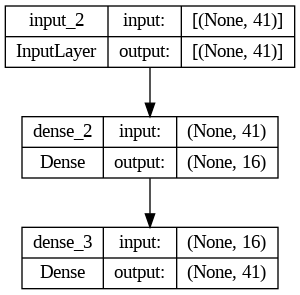

In [46]:
from keras.utils import plot_model

plot_model(autoencoder, to_file='autoencoder_visualization.png', show_shapes=True, show_layer_names=True)

In [47]:
normal_train_output = autoencoder.predict(x_train)

2096/2096 [==============================] - 3s 1ms/step


In [48]:
normal_train_output

array([[5.3901505e-03, 5.0202602e-01, 2.8216594e-01, ..., 3.6660801e-03,
        1.1459120e-02, 7.4593616e-03],
       [5.4557435e-02, 9.9218124e-01, 6.3993073e-01, ..., 1.5732537e-04,
        6.4810482e-04, 5.4995285e-04],
       [7.9256235e-05, 4.9785808e-01, 3.4592837e-01, ..., 2.1375827e-03,
        8.9238575e-03, 4.9290620e-03],
       ...,
       [8.2246428e-05, 5.0051248e-01, 3.4717134e-01, ..., 9.2110271e-04,
        1.0670557e-02, 7.9973713e-03],
       [5.0322508e-04, 5.0258905e-01, 3.4513521e-01, ..., 1.7521350e-04,
        9.7731012e-01, 9.2956465e-01],
       [4.1613754e-04, 9.9126023e-01, 1.7405978e-01, ..., 9.4554880e-06,
        3.6097327e-03, 3.2700901e-03]], dtype=float32)

### Calculating reconstruction loss of normal traffic data from train dataset

In [49]:
mse_normal_train = np.mean(np.power(x_train - normal_train_output, 2), axis=1)
np.average(mse_normal_train)

0.00034032998

### Testing the model

In [50]:
normal_test = test_df.loc[test_df["label"] == "normal"]
anomalous_test = test_df.loc[test_df["label"] != "normal"]

In [51]:
normal_test.shape

(10000, 42)

In [52]:
anomalous_test.shape

(71463, 42)

In [53]:
normal_test = normal_test.drop("label",axis=1)
anomalous_test = anomalous_test.drop("label",axis=1)

In [54]:
normal_test = np.array(normal_test).astype("float32")
anomalous_test = np.array(anomalous_test).astype("float32")

### Evaluating model on normal data from test dataset

In [55]:
normal_test_op = autoencoder.predict(normal_test)

313/313 [==============================] - 1s 2ms/step


### Calculating reconstruction loss of normal traffic data from test dataset

In [56]:
mse_normal_test = np.mean(np.power(normal_test - normal_test_op, 2), axis=1)
np.average(mse_normal_test)

0.0013048128

In [57]:
mse_normal_test

array([0.00045225, 0.00063797, 0.00014303, ..., 0.0002716 , 0.00025008,
       0.00028495], dtype=float32)

In [58]:
threshold = np.mean(mse_normal_train) + np.std(mse_normal_train)
print("Threshold: ", threshold)

Threshold:  0.0013215435


### Find how many normal traffic data from test dataset is classified as normal

In [59]:
normal_count=0
non_normal_count=0
for i in mse_normal_test:
  if i < threshold:
    normal_count+=1
  else:
    non_normal_count+=1
print(f"normal count : {normal_count}")
print(f"non normal count : {non_normal_count}")

normal count : 9336
non normal count : 664


### Calculating reconstruction loss of anomalous traffic data from test dataset

In [60]:
anomalous_test_op = autoencoder.predict(anomalous_test)

2234/2234 [==============================] - 6s 3ms/step


In [61]:
mse_anomalous_test = np.mean(np.power(anomalous_test - anomalous_test_op, 2), axis=1)
np.average(mse_anomalous_test)

# loss1 = tf.keras.losses.mae(anomalous_test_op,np.array(anomalous_test).astype("float32"))
# np.max(loss1)

0.015747564

### Find how many anomalous traffic data from test dataset is classified as normal

In [62]:
anomalous_count=0
non_anomalous_count=0
for i in mse_anomalous_test:
  if i > threshold:
    anomalous_count+=1
  else:
    non_anomalous_count+=1
print(f"anomalous count : {anomalous_count}")
print(f"non anomalous count : {non_anomalous_count}")

anomalous count : 60012
non anomalous count : 11451


### Find how many normal traffic data from train dataset is classified as normal

In [63]:
normal_train_count=0
non_normal_train_count=0
for i in mse_normal_train:
  if i < threshold:
    normal_train_count+=1
  else:
    non_normal_train_count+=1
print(f"normal train count : {normal_train_count}")
print(f"non normal train count : {non_normal_train_count}")

normal train count : 65370
non normal train count : 1684



* TP = 64300
* FN = 7163
* TN = 9124
* FP = 876

### Verifying evalutation metrics using code

In [64]:
target_test = []
for i in test_df["label"]:
  if i == "normal":
    target_test += [0]
  else:
    target_test += [1]

In [65]:
x_test = test_df.drop("label",axis=1)

In [66]:
x_test = np.array(x_test).astype("float32")

In [67]:
x_test_output = autoencoder.predict(x_test)

2546/2546 [==============================] - 4s 2ms/step


In [68]:
mse_test = np.mean(np.power(x_test - x_test_output, 2), axis=1)
np.average(mse_test)

0.0139746405

In [69]:
test_pred = []
for i in mse_test:
  if i > threshold:
    test_pred += [1]
  else:
    test_pred += [0]

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(target_test, test_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(target_test, test_pred))

Confusion Matrix:
[[ 9336   664]
 [11451 60012]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.93      0.61     10000
           1       0.99      0.84      0.91     71463

    accuracy                           0.85     81463
   macro avg       0.72      0.89      0.76     81463
weighted avg       0.92      0.85      0.87     81463



In [71]:
# fig, ax = plt.subplots(figsize=(4, 3))
# group_names = ["TN","FP","FN","TP"]
# group_counts = [f"{value:0.0f}" for value in cm.flatten()]
# # group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
# labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [72]:
len(x_train[0])

41

In [73]:
# from sklearn.cluster import KMeans
# inertias = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(x_train)
#     inertias.append(kmeans.inertia_)

# plt.plot(range(1,11), inertias, marker='o')
# plt.title('Elbow method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [74]:
# kmeans = KMeans(n_clusters=4)

# y = kmeans.fit_predict(x_train)

# train_df['Cluster_4'] = y

In [75]:
# train_df["Cluster_4"].value_counts()

In [76]:
# kmeans = KMeans(n_clusters=5)

# y = kmeans.fit_predict(x_train)

# train_df['Cluster_5'] = y

# # train_df.head(10)

In [77]:
# train_df["Cluster_5"].value_counts()

In [78]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

y = kmeans.fit_predict(x_train)

train_df['Cluster_6'] = y

train_df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


duration protocol_type   service flag src_bytes dst_bytes land  \
0      0.0           0.5  0.289855  0.9       0.0       0.0    0   
1      0.0           1.0  0.637681  0.9       0.0       0.0    0   
2      0.0           0.5  0.347826  0.9       0.0  0.000006    0   
3      0.0           0.5  0.347826  0.9       0.0       0.0    0   
4      0.0           0.5  0.347826  0.9       0.0  0.000002    0   
5      0.0           0.5  0.347826  0.9       0.0  0.000011    0   
6      0.0           0.5  0.347826  0.9       0.0       0.0    0   
7      0.0           0.5  0.347826  0.9       0.0  0.000001    0   
8      0.0           0.5  0.347826  0.9       0.0  0.000009    0   
9  0.09715           1.0  0.637681  0.9       0.0       0.0    0   

  wrong_fragment urgent  hot num_failed_logins logged_in num_compromised  \
0              0    0.0  0.0               0.0         0             0.0   
1              0    0.0  0.0               0.0         0             0.0   
2              0    0.0  0.0               0.0         1             0.0   
3              0    0.0  0.0               0.0         1             0.0   
4              0    0.0  0.0               0.0         1             0.0   
5              0    0.0  0.0               0.0         1             0.0   
6              0    0.0  0.0               0.0         1             0.0   
7              0    0.0  0.0               0.0         1             0.0   
8              0    0.0  0.0               0.0         1             0.0   
9              0    0.0  0.0               0.0         0             0.0   

  root_shell su_attempted num_root num_file_creations num_shells  \
0          0          0.0      0.0                0.0        0.0   
1          0          0.0      0.0                0.0        0.0   
2          0          0.0      0.0                0.0        0.0   
3          0          0.0      0.0                0.0        0.0   
4          0          0.0      0.0                0.0        0.0   
5          0          0.0      0.0                0.0        0.0   
6          0          0.0      0.0                0.0        0.0   
7          0          0.0      0.0                0.0        0.0   
8          0          0.0      0.0                0.0        0.0   
9          0          0.0      0.0                0.0        0.0   

  num_access_files num_outbound_cmds is_host_login is_guest_login     count  \
0              0.0                 0             0              0  0.003914   
1              0.0                 0             0              0   0.02544   
2              0.0                 0             0              0  0.009785   
3              0.0                 0             0              0  0.058708   
4              0.0                 0             0              0  0.005871   
5              0.0                 0             0              0  0.015656   
6              0.0                 0             0              0  0.005871   
7              0.0                 0             0              0  0.017613   
8              0.0                 0             0              0  0.015656   
9              0.0                 0             0              0  0.001957   

  srv_count serror_rate srv_serror_rate rerror_rate srv_rerror_rate  \
0  0.003914         0.0             0.0         0.0             0.0   
1  0.001957         0.0             0.0         0.0             0.0   
2  0.009785         0.2             0.2         0.0             0.0   
3  0.062622         0.0             0.0         0.0             0.0   
4  0.013699         0.0             0.0         0.0             0.0   
5  0.017613         0.0            0.11         0.0             0.0   
6  0.005871         0.0             0.0         0.0             0.0   
7  0.019569         0.0             0.0         0.0             0.0   
8  0.019569         0.0             0.0         0.0             0.0   
9  0.001957         0.0             0.0         0.0             0.0   

  same_srv_rate

In [79]:
train_df["Cluster_6"].value_counts()

Cluster_6
4    20015
1    16432
5    11311
3     9423
2     6976
0     2897
Name: count, dtype: int64

In [80]:
# len(anomalous_test)

In [81]:
# # kmeans.predict()
# single_data = np.array(x_train[0]).reshape(1,-1)
# kmeans.predict(single_data)

In [82]:
# count=[0]*6
# for i in range(len(anomalous_test)):
#   single_data_anomalous = np.array(anomalous_test[i]).reshape(1,-1)
#   cluster_assignment = kmeans.predict(single_data_anomalous)[0]
#   count[cluster_assignment]+=1
# for i in range(len(count)):
#   print(f"{i} = {count[i]}")


#### Silhouette score measures how similar an object is to its own cluster compared to other clusters.

In [83]:
# from sklearn.metrics import silhouette_score

# silhouette_scores = []
# for k in range(2, 13):
#     kmeans = KMeans(n_clusters=k)
#     labels = kmeans.fit_predict(x_train)
#     score = silhouette_score(x_train, labels)
#     silhouette_scores.append(score)
# print(silhouette_scores)

In [84]:
np.average([0.3799493, 0.40116626, 0.40610144, 0.36659902, 0.4061593, 0.43478218, 0.445773, 0.45815152])

0.4123352525








```
no of clusters = 2; Silhouette score = 0.3799493
no of clusters = 3; Silhouette score = 0.40116626
no of clusters = 4; Silhouette score = 0.40610144
no of clusters = 5; Silhouette score = 0.36659902
no of clusters = 6; Silhouette score = 0.4061593
no of clusters = 7; Silhouette score = 0.43478218
no of clusters = 8; Silhouette score = 0.445773
no of clusters = 9; Silhouette score = 0.45815152

average = 0.4123352525
Selected no. of clusters = 6
```




### Silhouette score
[0.3799493, 0.40116626, 0.40610144, 0.36659902, 0.4061593, 0.43478218, 0.445773, 0.45815152, 0.46496794, 0.46395656, 0.47388518] 2-12

In [85]:
# from sklearn.metrics import davies_bouldin_score

# db_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k)
#     labels = kmeans.fit_predict(X)
#     score = davies_bouldin_score(X, labels)
#     db_scores.append(score)
#     print(db_scores)

### Davies-Bouldin index - measures the compactness and separation of clusters
### Lower values are better
##### [0.733057668901962, 0.7555099168565746, 1.2446079968034003, 1.1909810912394254, 1.2417191950064965, 1.1911925326560844, 1.0515816505153819, 1.079250781871528, 1.0339256757596815]

In [86]:
# from sklearn.metrics import calinski_harabasz_score

# ch_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k)
#     labels = kmeans.fit_predict(X)
#     score = calinski_harabasz_score(X, labels)
#     ch_scores.append(score)


In [87]:
# print(ch_scores)

### Calinski-Harabasz index - ratio of between-cluster variance to within-cluster variance.
### higher the better
##### [96118.24635601316, 124488.2438637208, 113254.57836268976, 97770.26217660471, 91165.76209128421, 85167.607224014, 80653.49465380436, 77737.98473126955, 77096.54216044008]

## PCA IMAGE

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_train)


# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(x_train)


# df_visualization = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('2D PCA Representation with Clusters')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

# TSNE

In [89]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_train)


# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(x_train)


# import pandas as pd
# df_visualization = pd.DataFrame({'t-SNE 1': X_tsne[:, 0], 't-SNE 2': X_tsne[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('t-SNE Representation with Clusters')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_test)


# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(x_test)


# df_visualization = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('2D PCA Representation with Clusters')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_test)


# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(x_test)


# import pandas as pd
# df_visualization = pd.DataFrame({'t-SNE 1': X_tsne[:, 0], 't-SNE 2': X_tsne[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('t-SNE Representation with Clusters')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.show()

# visualisation

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.manifold import TSNE

# # Combine normal and anomalous points
# X = np.concatenate((x_train, anomalous_test), axis=0)

# # Perform K-means clustering
# kmeans = KMeans(n_clusters=6, random_state=42)
# cluster_labels = kmeans.fit_predict(X)

# # Perform t-SNE transformation
# tsne = TSNE(n_components=2, random_state=42)
# tsne_result = tsne.fit_transform(X)

# # Extract t-SNE representation of normal and anomalous points
# tsne_result_normal = tsne_result[:len(x_train)]
# tsne_result_anomalous = tsne_result[len(x_train):]

# # Plot clustered data points with different colors for each cluster
# plt.figure(figsize=(10, 8))
# for i in range(6):
#     plt.scatter(tsne_result[cluster_labels == i, 0], tsne_result[cluster_labels == i, 1], label=f'Cluster {i}')

# # Overlay normal points with blue color and circle marker
# plt.scatter(tsne_result_normal[:, 0], tsne_result_normal[:, 1], color='blue', label='Normal Points', marker='o')

#
# plt.scatter(tsne_result_anomalous[:, 0], tsne_result_anomalous[:, 1], color='red', label='Anomalous Points', marker='x')

# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.title('t-SNE Representation with Clusters')
# plt.legend()
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.manifold import TSNE

#

#
# plt.figure(figsize=(10, 8))
# for i in range(6):
#     plt.scatter(tsne_result[cluster_labels == i, 0], tsne_result[cluster_labels == i, 1], label=f'Cluster {i}')

#
# plt.scatter(tsne_result_normal[:, 0], tsne_result_normal[:, 1], color='blue', label='Normal Points', marker='o')

#
# plt.scatter(tsne_result_anomalous[:, 0], tsne_result_anomalous[:, 1], color='red', label='Anomalous Points', marker='x')

# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.title('t-SNE Representation with Clusters')
# plt.legend()
# plt.show()


In [ ]:
# cluster_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
# # cluster_markers = ['o', '^', 's', 'p', 'P', 'X']

#
# plt.figure(figsize=(10, 8))
# for i in range(6):
#     plt.scatter(tsne_result[cluster_labels == i, 0], tsne_result[cluster_labels == i, 1],
#                 label=f'Cluster {i}', color=cluster_colors[i])

#
# # plt.scatter(tsne_result_normal[:, 0], tsne_result_normal[:, 1], color='blue', label='Normal Points', marker='o')

#
# # plt.scatter(tsne_result_anomalous[:, 0], tsne_result_anomalous[:, 1], color='red', label='Anomalous Points', marker='x')

# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.title('t-SNE Representation with Clusters')
# plt.legend()
# plt.show()

## visualisation - cluster wise (normal and anomalous)

In [90]:
# cluster_labels_normal = cluster_labels[:len(x_train)]
# cluster_labels_anomalous = cluster_labels[len(x_train):]

# # cluster_colors = ['blue', 'dodgerblue', 'skyblue', 'deepskyblue', 'lightskyblue', 'lightblue']
# # normal_colors = ['red', 'orangered', 'darkorange', 'orange', 'gold', 'darkgoldenrod']
# cluster_colors = ['lightgreen', 'greenyellow', 'lime', 'olive', 'forestgreen','darkgreen']
# normal_colors = ['orange', 'pink', 'red','chocolate', 'brown', 'maroon']
# # normal_colors = ['cyan', 'darkturquoise', 'violet', 'darkviolet', 'mediumblue', 'midnightblue']



# plt.figure(figsize=(10, 8))
# # for i in range(6):
# #     plt.scatter(tsne_result[cluster_labels == i, 0], tsne_result[cluster_labels == i, 1],
# #                 label=f'Cluster {i}', color=cluster_colors[i])


# for i in range(6):
#     plt.scatter(tsne_result_normal[cluster_labels_normal == i, 0], tsne_result_normal[cluster_labels_normal == i, 1],
#                 label=f'Cluster {i} Normal', color=normal_colors[i], marker='o')


# for i in range(6):
#     plt.scatter(tsne_result_anomalous[cluster_labels_anomalous == i, 0], tsne_result_anomalous[cluster_labels_anomalous == i, 1],
#                 label=f'Cluster {i} Anomalous', color=cluster_colors[i], marker='o')

# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.title('t-SNE Representation with Clusters')
# plt.legend()
# plt.show()

NameError: name 'cluster_labels' is not defined

In [103]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances


kmeans_01 = KMeans(n_clusters=6, random_state=42)
kmeans_01.fit(x_train)
cluster_centers = kmeans_01.cluster_centers_


normal_cluster_labels = kmeans_01.predict(x_train)
anomalous_cluster_labels = kmeans_01.predict(anomalous_test)


normal_distances = pairwise_distances(x_train, cluster_centers, metric='euclidean')
anomalous_distances = pairwise_distances(anomalous_test, cluster_centers, metric='euclidean')


# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.hist(normal_distances.min(axis=1), bins=30, alpha=0.5, color='blue', label='Normal Points')
# plt.hist(anomalous_distances.min(axis=1), bins=30, alpha=0.5, color='red', label='Anomalous Points')
# plt.xlabel('Distance to Nearest Cluster Center')
# plt.ylabel('Frequency')
# plt.title('Distribution of Distances to Nearest Cluster Center')
# plt.legend()
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [104]:
cluster_points_normal_arr = []
for i in range(6):
    cluster_points_normal_arr.append(x_train[kmeans_01.labels_ == i])

from sklearn.metrics import pairwise_distances

normal_distances = []
cluster_distances_normal_arr = []
for i in range(6):
    cluster_center = kmeans_01.cluster_centers_[i]
    cluster_points = cluster_points_normal_arr[i]
    distances = pairwise_distances(cluster_points, [cluster_center])
    cluster_distances_normal_arr.append(distances)
    normal_distances.extend(distances)

In [105]:
cluster_points_anomalous_arr = []
cluster_pred = kmeans_01.predict(anomalous_test)
cluster_points_anomalous_arr = []
for i in range(6):
  cluster_points_anomalous_arr.append(anomalous_test[cluster_pred == i ])


from sklearn.metrics import pairwise_distances

anomalous_distances = []
cluster_distances_anomalous_arr = []
for i in range(6):
  cluster_center = kmeans_01.cluster_centers_[i]
  cluster_points = cluster_points_anomalous_arr[i]
  distances = pairwise_distances(cluster_points, [cluster_center])
  cluster_distances_anomalous_arr.append(distances)
  anomalous_distances.extend(distances)

In [106]:
normal_distances = [item[0] for item in normal_distances]
anomalous_distances = [item[0] for item in anomalous_distances]

In [107]:
cluster_distances_normal_list = [[float(item[0]) for item in arr] for arr in cluster_distances_normal_arr]
cluster_distances_anomalous_list = [[float(item[0]) for item in arr] for arr in cluster_distances_anomalous_arr]


## hitogram - distribution of distance to cluster centers

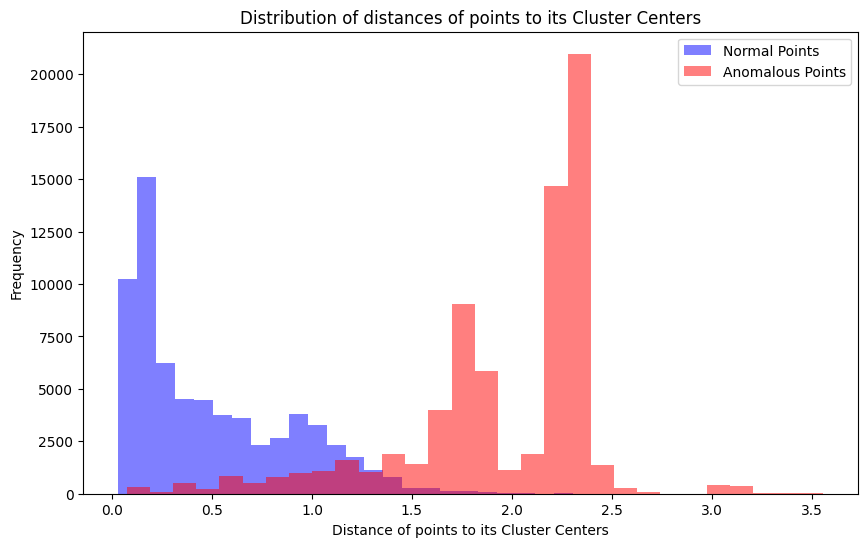

In [108]:
import matplotlib.pyplot as plt

# Define colors for normal and anomalous points
normal_color = 'blue'
anomalous_color = 'red'

plt.figure(figsize=(10, 6))
plt.hist(normal_distances, bins=30, alpha=0.5, color=normal_color, label='Normal Points')
plt.hist(anomalous_distances, bins=30, alpha=0.5, color=anomalous_color, label='Anomalous Points')
plt.xlabel('Distance of points to its Cluster Centers')
plt.ylabel('Frequency')
plt.title('Distribution of distances of points to its Cluster Centers')
plt.legend()
plt.show()


## hitogram - distribution of distance to cluster centers (cluster wise)

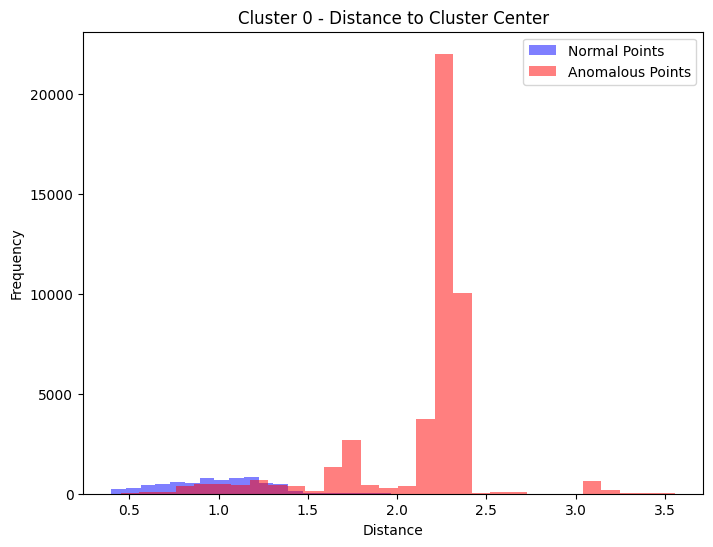

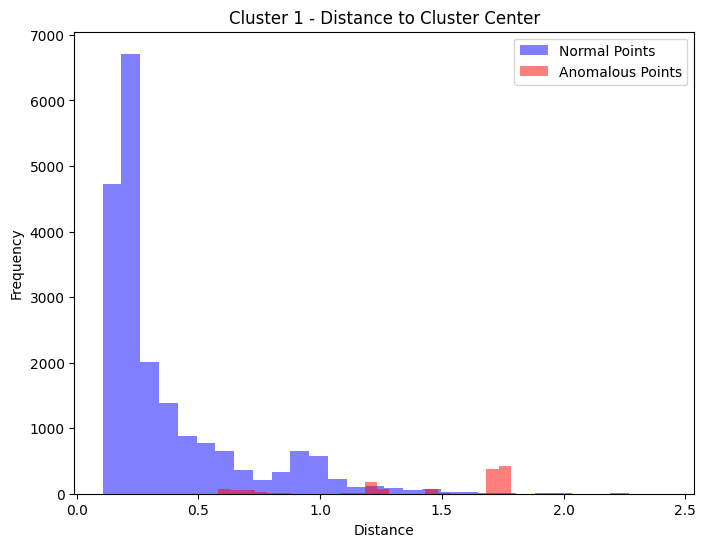

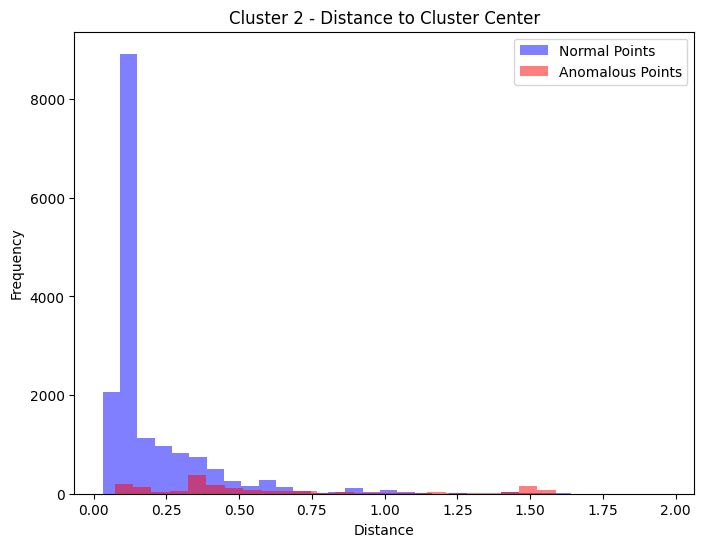

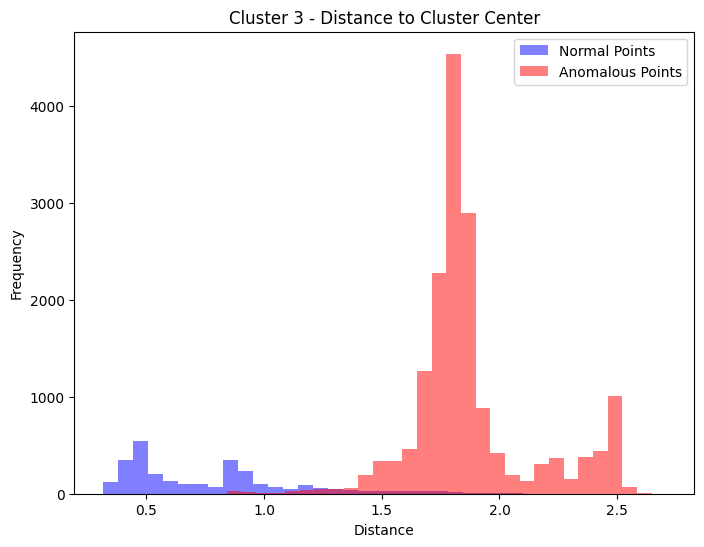

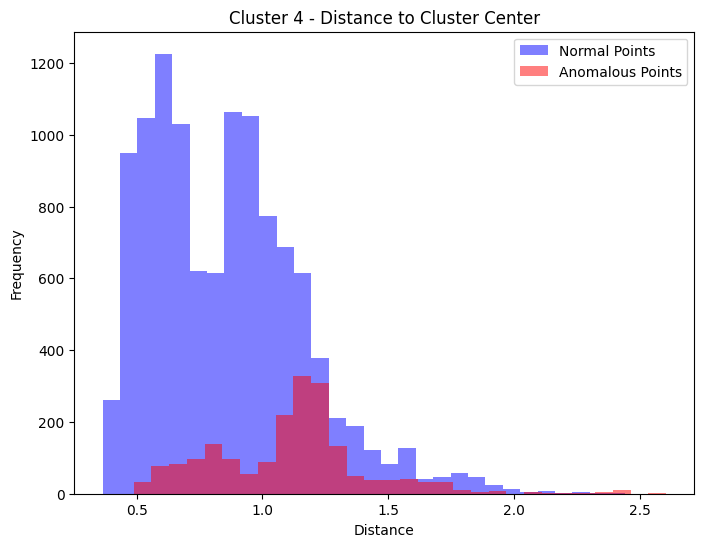

In [109]:
for i in range(6):
    plt.figure(figsize=(8, 6))
    plt.hist(cluster_distances_normal_list[i], bins=30, color='blue', alpha=0.5, label='Normal Points')
    plt.hist(cluster_distances_anomalous_list[i], bins=30, color='red', alpha=0.5, label='Anomalous Points')
    plt.title(f'Cluster {i} - Distance to Cluster Center')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [98]:
import numpy as np


# cluster_thresholds = [1.38, 1.1, 0.3, 1.3, 1.1, 0.882]

cluster_thresholds = [1.3652401644774157, 1.4431604736983172, 1.0733108087019487, 1.25846111894858, 2.236025815058236, 1.3378374937808875]


TP_list = []
TN_list = []
FP_list = []
FN_list = []
accuracy_list = []


for i in range(6):
    TP = np.sum(np.array(cluster_distances_anomalous_list[i]) > cluster_thresholds[i])
    TN = np.sum(np.array(cluster_distances_normal_list[i]) <= cluster_thresholds[i])
    FP = np.sum(np.array(cluster_distances_normal_list[i]) > cluster_thresholds[i])
    FN = np.sum(np.array(cluster_distances_anomalous_list[i]) <= cluster_thresholds[i])

    accuracy = (TP + TN) / (TP + TN + FP + FN)


    TP_list.append(TP)
    TN_list.append(TN)
    FP_list.append(FP)
    FN_list.append(FN)
    accuracy_list.append(accuracy)


    print(f"Cluster {i}:")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"Accuracy: {accuracy}\n")


overall_accuracy = np.mean(accuracy_list)
print(f"Overall Accuracy: {overall_accuracy}")


Cluster 0:
True Positives (TP): 42721
True Negatives (TN): 6576
False Positives (FP): 394
False Negatives (FN): 2933
Accuracy: 0.9367778960170264

Cluster 1:
True Positives (TP): 892
True Negatives (TN): 19896
False Positives (FP): 126
False Negatives (FN): 516
Accuracy: 0.9700419972001867

Cluster 2:
True Positives (TP): 336
True Negatives (TN): 16327
False Positives (FP): 106
False Negatives (FN): 1441
Accuracy: 0.9150466776496431

Cluster 3:
True Positives (TP): 16818
True Negatives (TN): 2584
False Positives (FP): 313
False Negatives (FN): 149
Accuracy: 0.9767418445428917

Cluster 4:
True Positives (TP): 21
True Negatives (TN): 11295
False Positives (FP): 8
False Negatives (FN): 1923
Accuracy: 0.8542311466747188

Cluster 5:
True Positives (TP): 2555
True Negatives (TN): 9228
False Positives (FP): 201
False Negatives (FN): 1158
Accuracy: 0.8965910820270887

Overall Accuracy: 0.9249051073519259


In [99]:
import numpy as np

best_thresholds = {}


for i in range(6):

    normal_distances = np.sort(cluster_distances_normal_list[i])
    anomalous_distances = np.sort(cluster_distances_anomalous_list[i])

    best_threshold = 0
    best_accuracy = 0
    for threshold in np.linspace(0, max(normal_distances.max(), anomalous_distances.max()), 100):


        num_anomalous_above_threshold = np.sum(anomalous_distances > threshold)

        num_normal_below_threshold = np.sum(normal_distances <= threshold)

        num_normal_above_threshold = np.sum(normal_distances > threshold)

        num_anomalous_below_threshold = np.sum(anomalous_distances <= threshold)

        accuracy = (num_anomalous_above_threshold + num_normal_below_threshold) / (num_anomalous_above_threshold + num_normal_below_threshold + num_normal_above_threshold + num_anomalous_below_threshold)

        if accuracy > best_accuracy:
            best_threshold = threshold
            best_accuracy = accuracy

    best_thresholds[i] = [best_threshold,best_accuracy]

sum=0

for i, threshold in best_thresholds.items():
    print(f"Cluster {i}: Best Threshold = {threshold[0]}  Best accuracy = {threshold[1]}")
    sum+=threshold[1]
print(f"accuracy = {sum/6}")



Cluster 0: Best Threshold = 1.3652401644774157  Best accuracy = 0.9367778960170264
Cluster 1: Best Threshold = 1.4431604736983172  Best accuracy = 0.9700419972001867
Cluster 2: Best Threshold = 1.0733108087019487  Best accuracy = 0.9150466776496431
Cluster 3: Best Threshold = 1.25846111894858  Best accuracy = 0.9767418445428917
Cluster 4: Best Threshold = 2.236025815058236  Best accuracy = 0.8542311466747188
Cluster 5: Best Threshold = 1.3378374937808875  Best accuracy = 0.8965910820270887
accuracy = 0.9249051073519259


# distance based anomaly detection

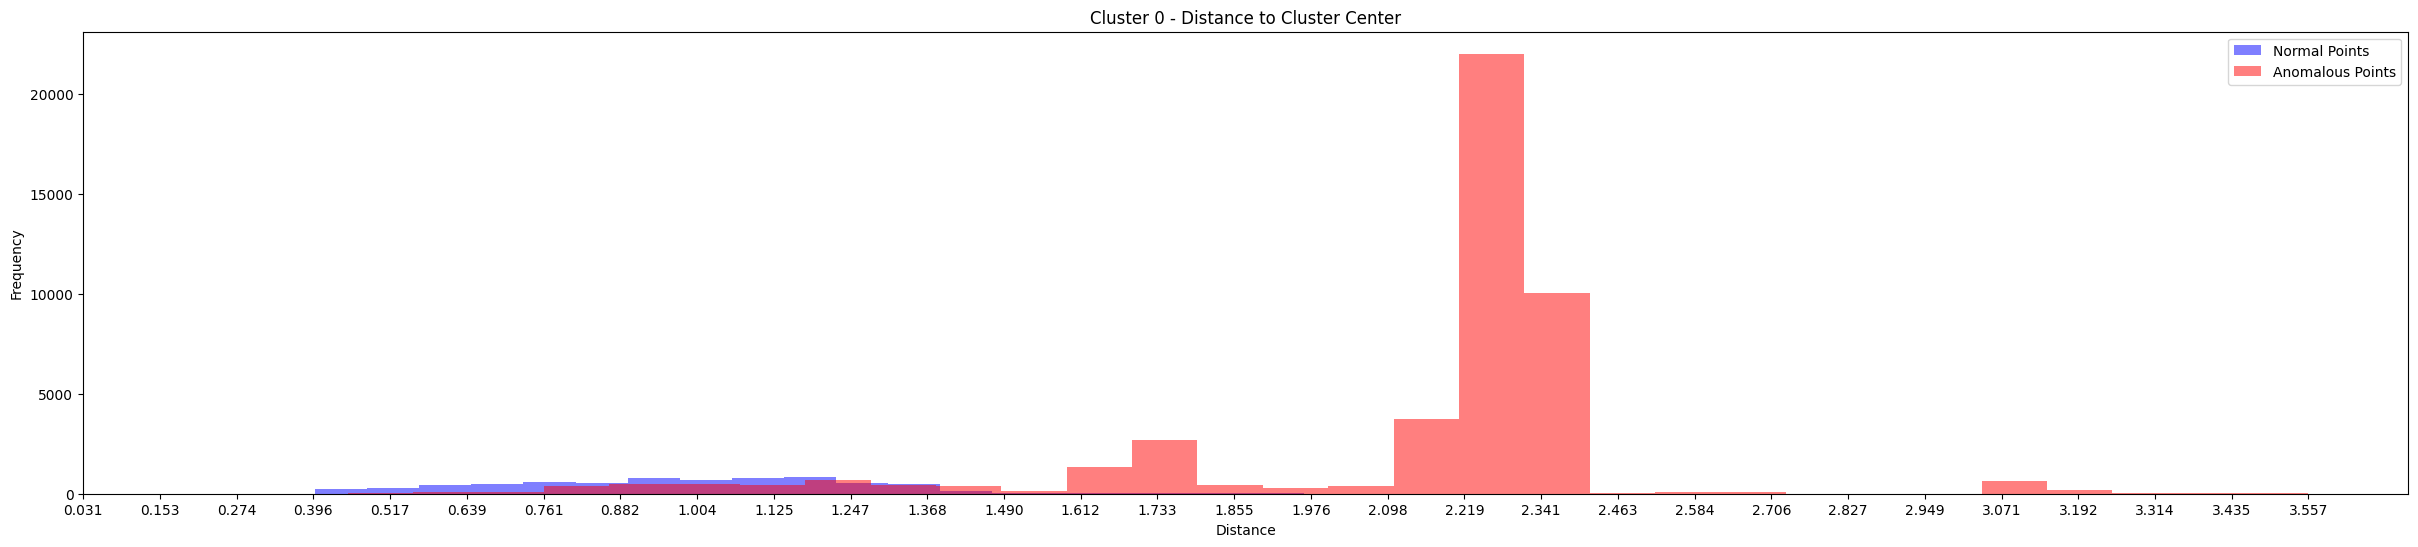

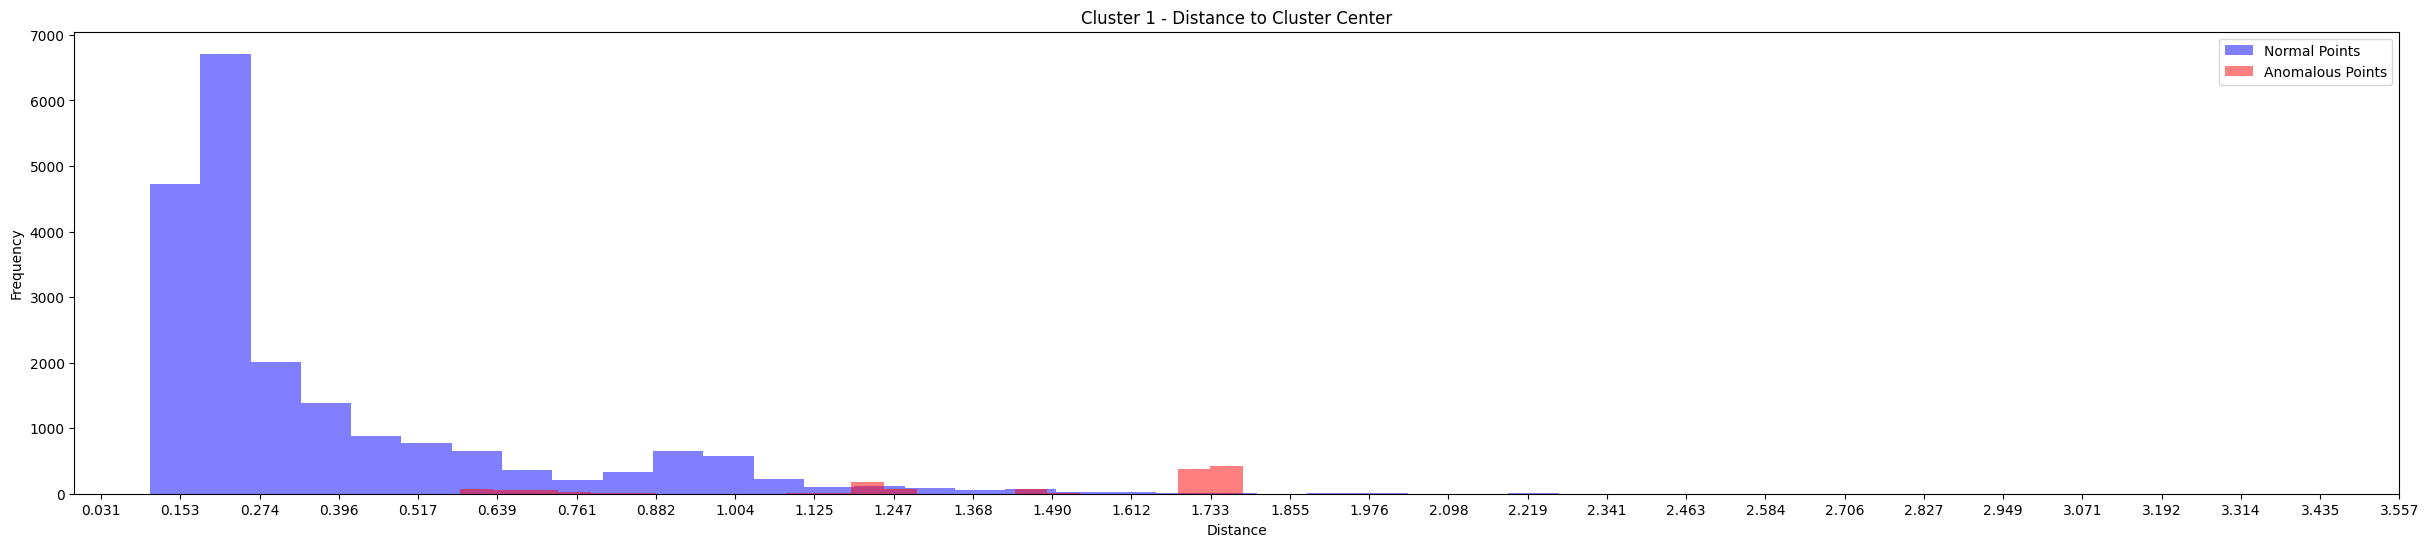

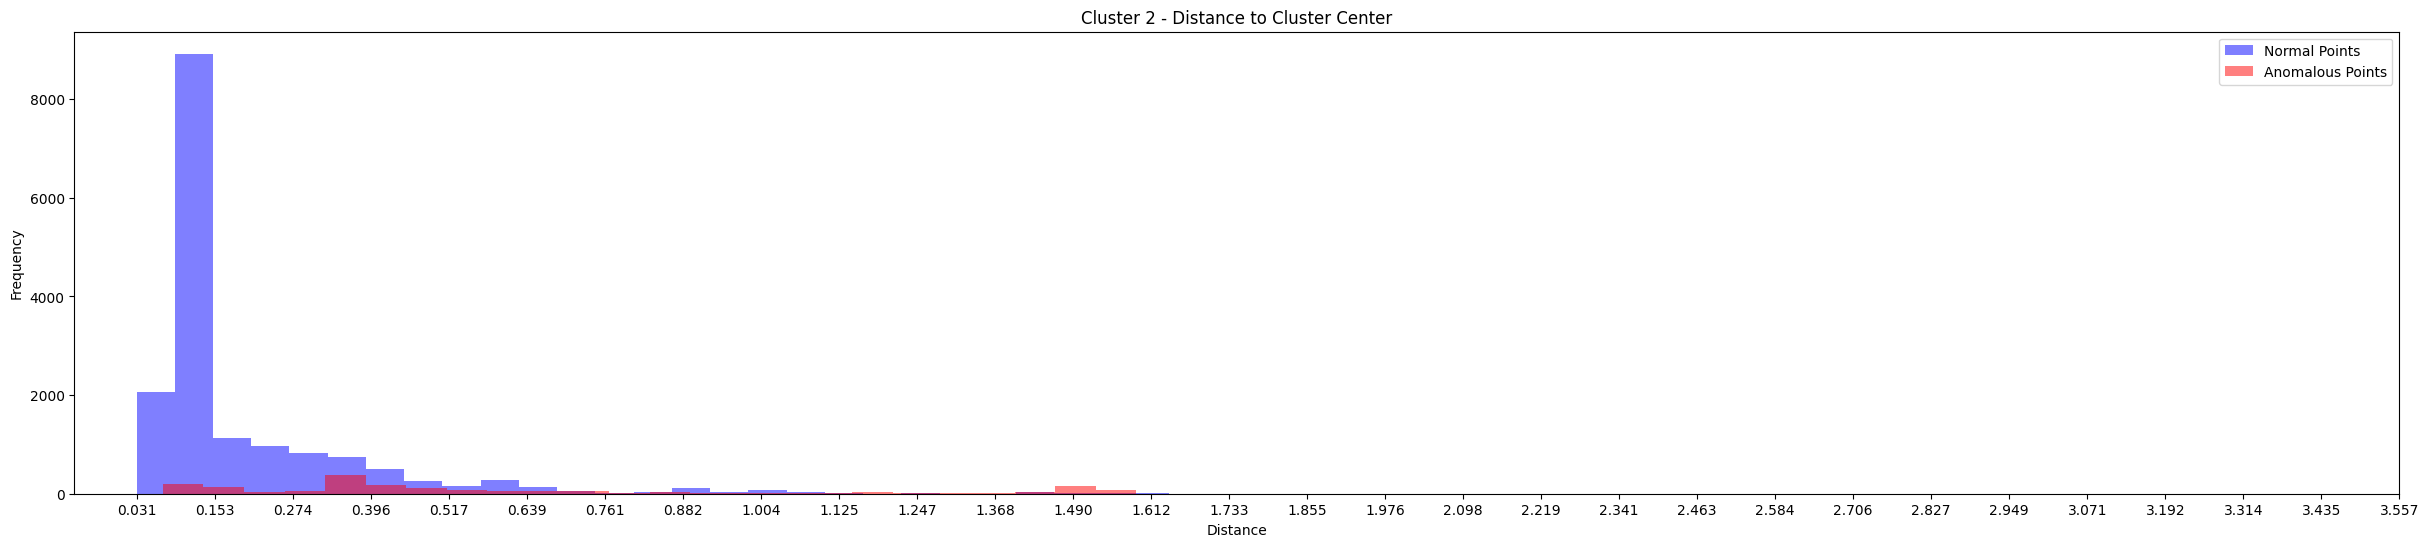

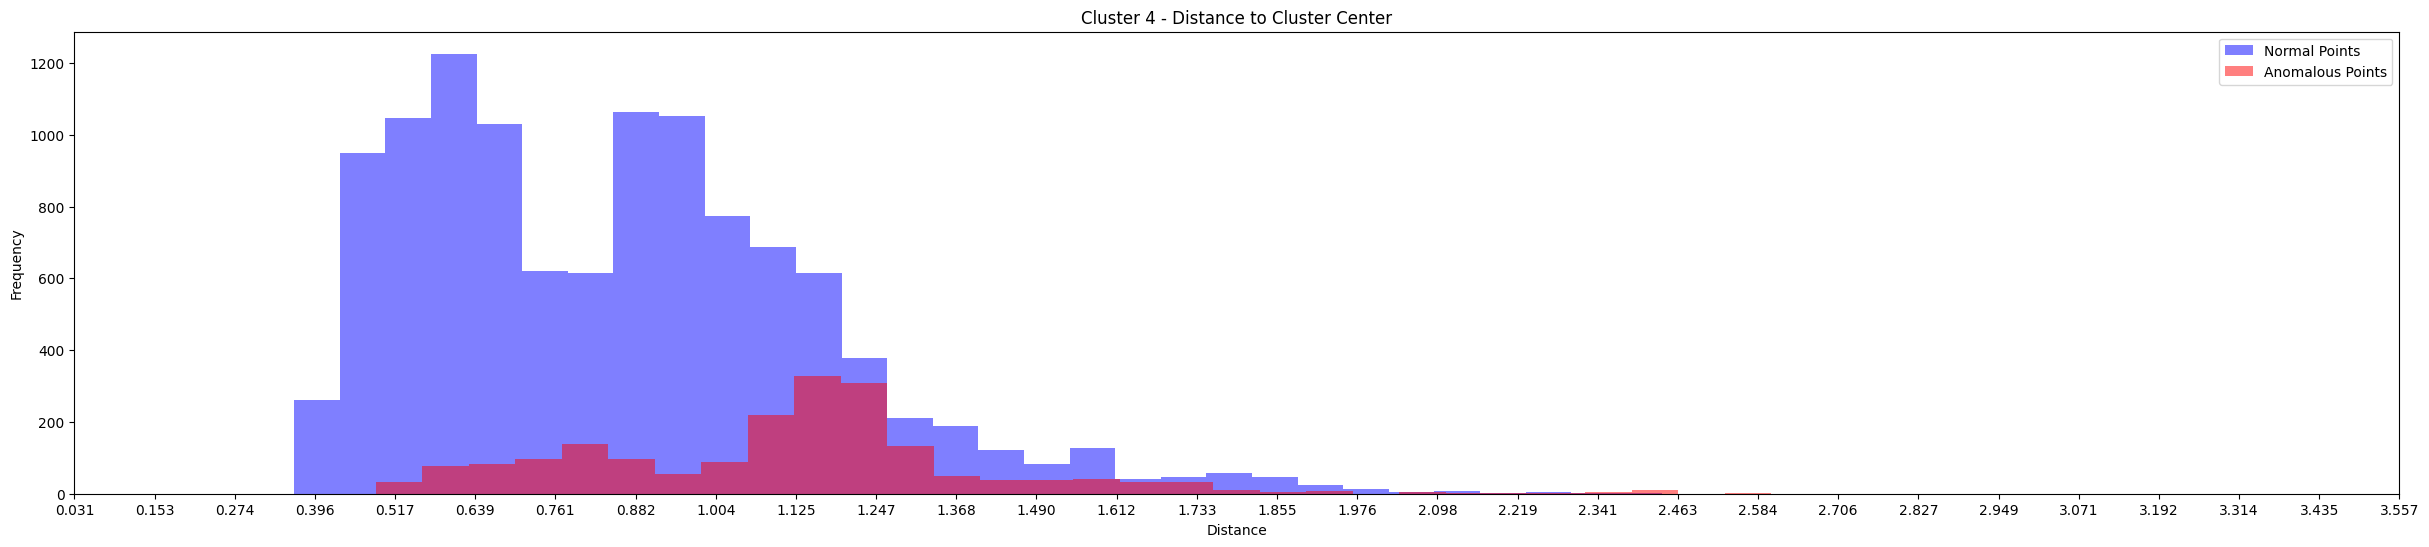

In [100]:
import numpy as np
import matplotlib.pyplot as plt


num_bins = 30
x_min = min(np.min(distances) for distances in cluster_distances_normal_list + cluster_distances_anomalous_list)
x_max = max(np.max(distances) for distances in cluster_distances_normal_list + cluster_distances_anomalous_list)


for i in range(6):
    plt.figure(figsize=(30, 6))
    plt.hist(cluster_distances_normal_list[i], bins=num_bins, color='blue', alpha=0.5, label='Normal Points')
    plt.hist(cluster_distances_anomalous_list[i], bins=num_bins, color='red', alpha=0.5, label='Anomalous Points')
    plt.title(f'Cluster {i} - Distance to Cluster Center')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.legend()
    plt.xticks(np.linspace(x_min, x_max, num=num_bins))
    plt.show()


In [101]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Assuming you have already trained a KMeans model and obtained the cluster centers
# Replace `kmeans` and `cluster_centers` with your pre-trained model and centers
# kmeans = KMeans(n_clusters=6, random_state=42)
# kmeans.fit(x_test)
# cluster_centers = kmeans.cluster_centers_


def average_distance_to_cluster_center(X, centers):

    distances = pairwise_distances_argmin_min(X, centers)[1]
    return np.mean(distances)


avg_distances_normal = []
avg_distances_anomalous = []


for cluster_center in cluster_centers:
    avg_distance_normal = average_distance_to_cluster_center(x_train, np.array([cluster_center]))
    avg_distances_normal.append(avg_distance_normal)


for cluster_center in cluster_centers:
    avg_distance_anomalous = average_distance_to_cluster_center(anomalous_test, np.array([cluster_center]))
    avg_distances_anomalous.append(avg_distance_anomalous)


print("Average distances of normal points to their nearest cluster centers:", avg_distances_normal)
print("Average distances of anomalous points to their nearest cluster centers:", avg_distances_anomalous)

Average distances of normal points to their nearest cluster centers: [1.5555377, 1.0361181, 1.0221004, 2.2984197, 1.2132981, 1.3614001]
Average distances of anomalous points to their nearest cluster centers: [2.1473246, 2.6658347, 2.5988061, 2.7321756, 2.3531933, 2.4571843]


In [110]:
# from sklearn.metrics import pairwise_distances


# normal_distances = []
# for i in range(len(cluster_centers)):
#     cluster_points = x_train[kmeans_01.labels_[len(x_train):] == i]
#     print(cluster_points)
#     cluster_center = cluster_centers[i]
#     distances = pairwise_distances(cluster_points, [cluster_center])
#     normal_distances.extend(distances)



# anomalous_distances = []
# for i in range(len(cluster_centers)):
#     cluster_points = anomalous_test[kmeans_01.labels_[len(anomalous_test):] == i]
#     print(cluster_points)
#     cluster_center = cluster_centers[i]
#     distances = pairwise_distances(cluster_points, [cluster_center])
#     anomalous_distances.extend(distances)


# normal_avg_distances = [np.mean(normal_distances[kmeans_01.labels_[:len(X_normal)] == i]) for i in range(len(cluster_centers))]
# anomalous_avg_distances = [np.mean(anomalous_distances[kmeans_01.labels_[len(X_normal):] == i]) for i in range(len(cluster_centers))]


# for i in range(len(cluster_centers)):
#     plt.figure(figsize=(8, 6))
#     plt.hist(normal_avg_distances[i], bins=30, color='blue', alpha=0.5, label='Normal Points')
#     plt.hist(anomalous_avg_distances[i], bins=30, color='red', alpha=0.5, label='Anomalous Points')
#     plt.title(f'Cluster {i} - Average Distance to Cluster Center')
#     plt.xlabel('Average Distance')
#     plt.ylabel('Frequency')
#     plt.legend()
#     plt.show()
